<a href="https://colab.research.google.com/github/AbdulrahmanElshafie/EDA-Project-on-STEG-Dataset/blob/main/EDA_Project_on_STEG_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Improting libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Reading Data

In [ ]:
client_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/client_train.csv')
invoice_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/invoice_train.csv')

<ipython-input-3-9b00e39e3449>:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  invoice_training = pd.read_csv('/content/drive/MyDrive/ML Academy - Project 1/Project 1/Train/invoice_train.csv')


## Shapes of datasets

In [ ]:
print(client_training.shape)
print(invoice_training.shape)

(135493, 6)
(4476749, 16)


# Exploring Client

## Number of unqiue values for in client file

In [ ]:
client_training['client_id'].nunique()

135493

## Unique classes

In [ ]:
client_training['target'].unique()

array([0., 1.])

## Samples from the client data

In [ ]:
print('client head\n')
client_training.head()

client head



,disrict,client_id,client_catg,region,creation_date,target
0,60,train_Client_0,11,101,31/12/1994,0.0
1,69,train_Client_1,11,107,29/05/2002,0.0
2,62,train_Client_10,11,301,13/03/1986,0.0
3,69,train_Client_100,11,105,11/07/1996,0.0
4,62,train_Client_1000,11,303,14/10/2014,0.0


In [ ]:
print('\nclient tail\n')
client_training.tail()


client tail



,disrict,client_id,client_catg,region,creation_date,target
135488,62,train_Client_99995,11,304,26/07/2004,0.0
135489,63,train_Client_99996,11,311,25/10/2012,0.0
135490,63,train_Client_99997,11,311,22/11/2011,0.0
135491,60,train_Client_99998,11,101,22/12/1993,0.0
135492,60,train_Client_99999,11,101,18/02/1986,0.0


## Client data info - data types, number of values, etc

In [ ]:
client_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


## Metrics of client data

In [ ]:
client_training.describe()

,disrict,client_catg,region,target
count,135493.000000,135493.000000,135493.000000,135493.000000
mean,63.511222,11.512506,206.159809,0.055841
std,3.354400,4.423761,104.207044,0.229614
min,60.000000,11.000000,101.000000,0.000000
25%,62.000000,11.000000,103.000000,0.000000
50%,62.000000,11.000000,107.000000,0.000000
75%,69.000000,11.000000,307.000000,0.000000
max,69.000000,51.000000,399.000000,1.000000


## Check null values

In [ ]:
client_training.isnull().sum()

disrict          0
client_id        0
client_catg      0
region           0
creation_date    0
target           0
dtype: int64

## Check duplicated values

In [ ]:
client_training[client_training.duplicated()]

,disrict,client_id,client_catg,region,creation_date,target


## Check the correlation of the data

<ipython-input-13-7a8816b213bb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = client_training.corr()


,disrict,client_catg,region,target
disrict,1.000000,0.032836,-0.313309,0.050749
client_catg,0.032836,1.000000,-0.041427,0.054745
region,-0.313309,-0.041427,1.000000,0.010940
target,0.050749,0.054745,0.010940,1.000000


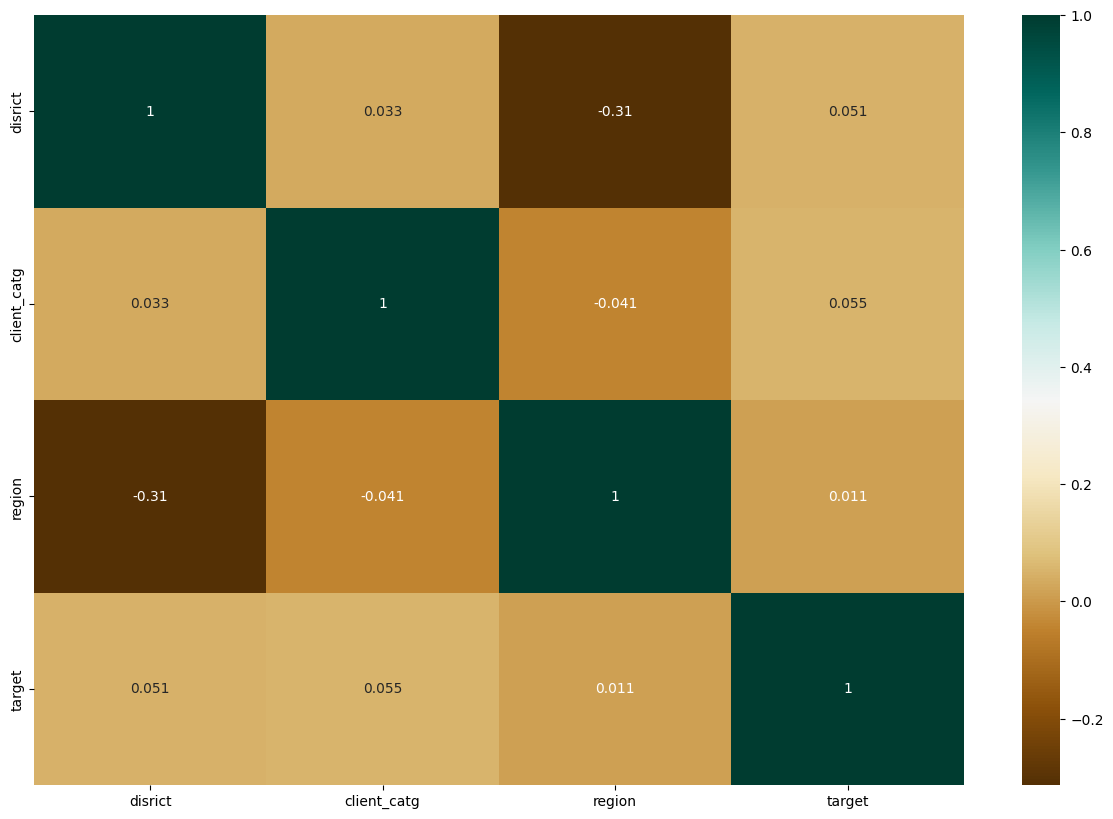

In [ ]:
plt.figure(figsize=(15, 10))
c = client_training.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

## Remove useless features

In [ ]:
client_training = client_training.drop(columns=['creation_date'])

In [ ]:
client_training

,disrict,client_id,client_catg,region,target
0,60,train_Client_0,11,101,0.0
1,69,train_Client_1,11,107,0.0
2,62,train_Client_10,11,301,0.0
3,69,train_Client_100,11,105,0.0
4,62,train_Client_1000,11,303,0.0
...,...,...,...,...,...
135488,62,train_Client_99995,11,304,0.0
135489,63,train_Client_99996,11,311,0.0
135490,63,train_Client_99997,11,311,0.0
135491,60,train_Client_99998,11,101,0.0


# Exploring Invoice

## Unique Values

In [ ]:
invoice_training.client_id.nunique()

135493

## Samples from invoice data

In [ ]:
print('invoice head\n')
invoice_training.head()

invoice head



,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


In [ ]:
print('invoice tail\n')
invoice_training.tail()

invoice tail



,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
4476744,train_Client_99998,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,ELEC
4476745,train_Client_99998,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,ELEC
4476746,train_Client_99999,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,ELEC
4476747,train_Client_99999,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,ELEC
4476748,train_Client_99999,1996-01-25,11,560948,0,203,6,1,516,0,0,0,12765,13281,4,ELEC


## Invoices info - data types, number of values, etc

In [ ]:
invoice_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4476749 entries, 0 to 4476748
Data columns (total 16 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   client_id             object
 1   invoice_date          object
 2   tarif_type            int64 
 3   counter_number        int64 
 4   counter_statue        object
 5   counter_code          int64 
 6   reading_remarque      int64 
 7   counter_coefficient   int64 
 8   consommation_level_1  int64 
 9   consommation_level_2  int64 
 10  consommation_level_3  int64 
 11  consommation_level_4  int64 
 12  old_index             int64 
 13  new_index             int64 
 14  months_number         int64 
 15  counter_type          object
dtypes: int64(12), object(4)
memory usage: 546.5+ MB


## Metrics of invoice data

In [ ]:
invoice_training.describe()

,tarif_type,counter_number,counter_code,reading_remarque,counter_coefficient,...,consommation_level_3,consommation_level_4,old_index,new_index,months_number
count,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,...,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06,4.476749e+06
mean,2.012804e+01,1.230587e+11,1.724884e+02,7.321702e+00,1.003040e+00,...,2.030620e+01,5.292588e+01,1.776700e+04,1.834970e+04,4.483095e+01
std,1.347256e+01,1.657267e+12,1.338871e+02,1.571654e+00,3.083466e-01,...,1.574239e+02,8.754725e+02,4.036693e+04,4.095321e+04,3.128335e+03
min,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.100000e+01,1.211080e+05,5.000000e+00,6.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,1.791000e+03,2.056000e+03,4.000000e+00
50%,1.100000e+01,4.945610e+05,2.030000e+02,8.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,7.690000e+03,8.192000e+03,4.000000e+00
75%,4.000000e+01,1.115161e+06,2.070000e+02,9.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,2.166000e+04,2.234300e+04,4.000000e+00
max,4.500000e+01,2.798115e+13,6.000000e+02,4.130000e+02,5.000000e+01,...,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05


## Check null values

In [ ]:
invoice_training.isnull().sum()

client_id               0
invoice_date            0
tarif_type              0
counter_number          0
counter_statue          0
counter_code            0
reading_remarque        0
counter_coefficient     0
consommation_level_1    0
consommation_level_2    0
consommation_level_3    0
consommation_level_4    0
old_index               0
new_index               0
months_number           0
counter_type            0
dtype: int64

## Check duplicated values

In [ ]:
invoice_training[invoice_training.duplicated()]

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
951893,train_Client_125864,2011-12-12,11,101545,5,413,6,1,0,0,0,0,13680,13680,2,ELEC
1755798,train_Client_25894,2010-07-13,40,6986740,5,5,6,1,0,0,0,0,0,0,2,GAZ
2137999,train_Client_3636,2012-01-18,40,312650,5,5,6,1,0,0,0,0,623,623,2,GAZ
2163374,train_Client_37069,2010-10-11,11,5284,5,413,6,1,0,0,0,0,99429,99429,2,ELEC
2433919,train_Client_44407,2008-02-28,11,66921,5,203,6,1,0,0,0,0,0,0,2,ELEC
2805729,train_Client_54609,2010-04-06,11,200912,5,207,6,1,0,0,0,0,0,0,2,ELEC
3260191,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,0,0,5946,5946,2,ELEC
3260198,train_Client_66981,2006-07-17,11,132701,5,420,6,1,0,0,0,0,5946,5946,2,ELEC
3394719,train_Client_7066,2014-10-28,40,4463323,5,5,6,1,0,0,0,0,80,80,2,GAZ
3462929,train_Client_72519,2013-01-21,11,246464,5,203,6,1,0,0,0,0,2954,2954,2,ELEC


## Some preprocessing for the data

In [ ]:
invoice_training['counter_type'] = invoice_training['counter_type'].apply(lambda x: 1 if str(x) == 'ELEC' else 0)

In [ ]:
invoice_training['counter_type'].unique()

array([1, 0])

In [ ]:
invoice_training = invoice_training[invoice_training['counter_statue'] != 'A']
invoice_training['counter_statue'] = invoice_training['counter_statue'].astype(int)
invoice_training = invoice_training[invoice_training['counter_statue'] < 5]
invoice_training['counter_statue'].unique()

<ipython-input-25-ed3ecbefcd2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  invoice_training['counter_statue'] = invoice_training['counter_statue'].astype(int)


array([0, 1, 4, 3, 2])

## Check the correlation of the data

<ipython-input-26-0f7b52e3564e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = invoice_training.corr()


,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
tarif_type,1.000000,-0.050697,0.023811,-0.833248,-0.060634,-0.006510,-0.186638,-0.061047,-0.087774,-0.041051,-0.194223,-0.196181,0.014255,-0.996737
counter_number,-0.050697,1.000000,-0.008787,0.030480,0.056121,-0.000726,-0.000670,-0.003080,0.015836,0.009124,-0.027786,-0.027211,-0.000966,0.050132
counter_statue,0.023811,-0.008787,1.000000,-0.013749,-0.011262,-0.000866,-0.020195,0.003851,-0.015232,-0.007151,-0.032402,-0.032451,-0.001403,-0.023859
counter_code,-0.833248,0.030480,-0.013749,1.000000,0.083324,0.025492,0.211240,0.130815,0.171420,0.116662,0.326600,0.330960,-0.000577,0.840796
reading_remarque,-0.060634,0.056121,-0.011262,0.083324,1.000000,0.001923,0.104963,0.002710,0.140665,0.070849,0.096597,0.099441,0.006967,0.057224
counter_coefficient,-0.006510,-0.000726,-0.000866,0.025492,0.001923,1.000000,0.004476,0.031387,0.005517,0.015518,0.003450,0.003372,0.000916,0.006481
consommation_level_1,-0.186638,-0.000670,-0.020195,0.211240,0.104963,0.004476,1.000000,0.068855,0.095838,0.024866,0.147881,0.157186,-0.006891,0.191117
consommation_level_2,-0.061047,-0.003080,0.003851,0.130815,0.002710,0.031387,0.068855,1.000000,0.042636,0.012691,0.178098,0.186014,0.030072,0.060122
consommation_level_3,-0.087774,0.015836,-0.015232,0.171420,0.140665,0.005517,0.095838,0.042636,1.000000,0.269458,0.147523,0.161923,0.090231,0.087056
consommation_level_4,-0.041051,0.009124,-0.007151,0.116662,0.070849,0.015518,0.024866,0.012691,0.269458,1.000000,0.279680,0.296973,-0.000570,0.040800


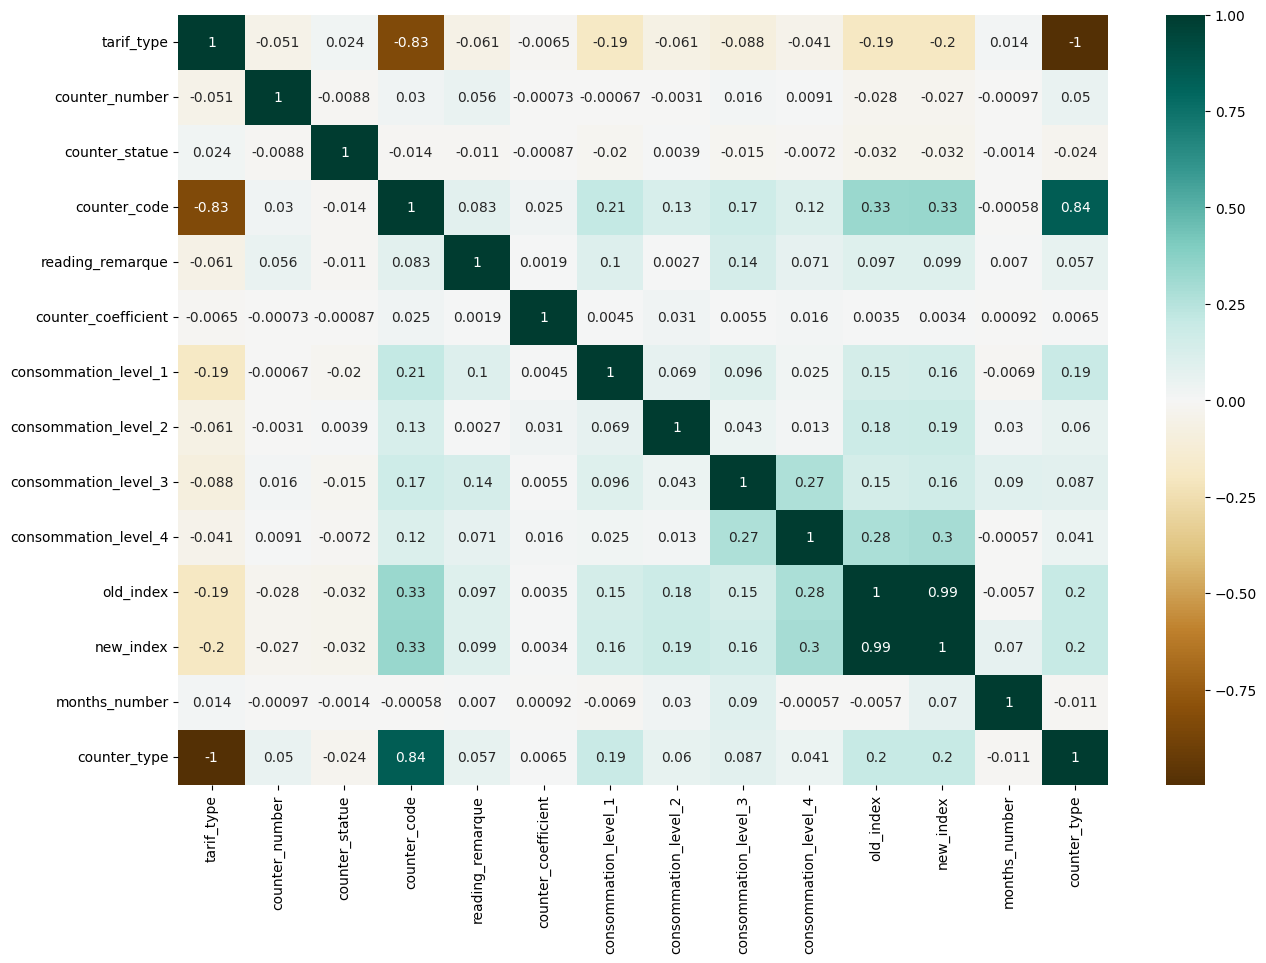

In [ ]:
plt.figure(figsize=(15, 10))
c = invoice_training.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

## Remove useless features

In [ ]:
# invoice_training_test = invoice_training.drop(columns=['client_id', 'invoice_date', 'counter_number', 'counter_code', 'old_index', 'new_index'])

In [ ]:
# invoice_training_test

# Merge

In [ ]:
dataset = pd.merge(client_training, invoice_training, on='client_id')
dataset

,disrict,client_id,client_catg,region,target,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,0.0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,1
1,60,train_Client_0,11,101,0.0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,1
2,60,train_Client_0,11,101,0.0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,1
3,60,train_Client_0,11,101,0.0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,1
4,60,train_Client_0,11,101,0.0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456058,60,train_Client_99998,11,101,0.0,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,1
4456059,60,train_Client_99998,11,101,0.0,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,1
4456060,60,train_Client_99999,11,101,0.0,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,1
4456061,60,train_Client_99999,11,101,0.0,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,1


In [ ]:
dataset[dataset['target'] == 1].shape

(350953, 20)

In [ ]:
dataset[dataset['target'] == 0].shape

(4105110, 20)

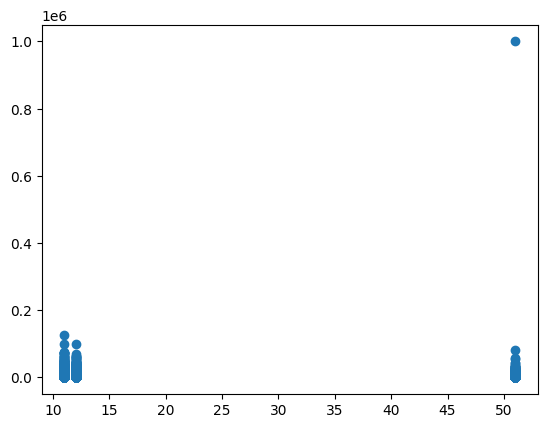

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dataset['client_catg'], dataset['consommation_level_1'])

## Check the relationship between features

<ipython-input-33-13f0aeece49d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c = dataset.corr()


,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
disrict,1.000000,0.023835,-0.320712,0.059668,0.068156,0.002968,0.024642,-0.014556,0.045885,-0.006718,0.017467,-0.008209,0.015413,0.009832,-0.017998,-0.017464,-0.004196,-0.068145
client_catg,0.023835,1.000000,-0.045527,0.074614,0.000332,0.001086,-0.000268,0.155165,0.072425,0.060728,0.045657,0.126326,0.084417,0.193097,0.442713,0.448809,0.073440,0.007507
region,-0.320712,-0.045527,1.000000,0.019320,-0.042151,0.017133,-0.016114,-0.027685,-0.010922,0.000933,-0.024307,-0.039321,-0.044585,-0.035027,-0.073550,-0.074305,0.000966,0.043532
target,0.059668,0.074614,0.019320,1.000000,0.013734,0.028122,-0.001807,-0.002394,0.006360,-0.002826,0.005670,0.008701,0.023765,0.013133,0.027423,0.028101,0.006717,-0.012050
tarif_type,0.068156,0.000332,-0.042151,0.013734,1.000000,-0.050697,0.023811,-0.833248,-0.060634,-0.006510,-0.186638,-0.061047,-0.087774,-0.041051,-0.194223,-0.196181,0.014255,-0.996737
counter_number,0.002968,0.001086,0.017133,0.028122,-0.050697,1.000000,-0.008787,0.030480,0.056121,-0.000726,-0.000670,-0.003080,0.015836,0.009124,-0.027786,-0.027211,-0.000966,0.050132
counter_statue,0.024642,-0.000268,-0.016114,-0.001807,0.023811,-0.008787,1.000000,-0.013749,-0.011262,-0.000866,-0.020195,0.003851,-0.015232,-0.007151,-0.032402,-0.032451,-0.001403,-0.023859
counter_code,-0.014556,0.155165,-0.027685,-0.002394,-0.833248,0.030480,-0.013749,1.000000,0.083324,0.025492,0.211240,0.130815,0.171420,0.116662,0.326600,0.330960,-0.000577,0.840796
reading_remarque,0.045885,0.072425,-0.010922,0.006360,-0.060634,0.056121,-0.011262,0.083324,1.000000,0.001923,0.104963,0.002710,0.140665,0.070849,0.096597,0.099441,0.006967,0.057224
counter_coefficient,-0.006718,0.060728,0.000933,-0.002826,-0.006510,-0.000726,-0.000866,0.025492,0.001923,1.000000,0.004476,0.031387,0.005517,0.015518,0.003450,0.003372,0.000916,0.006481


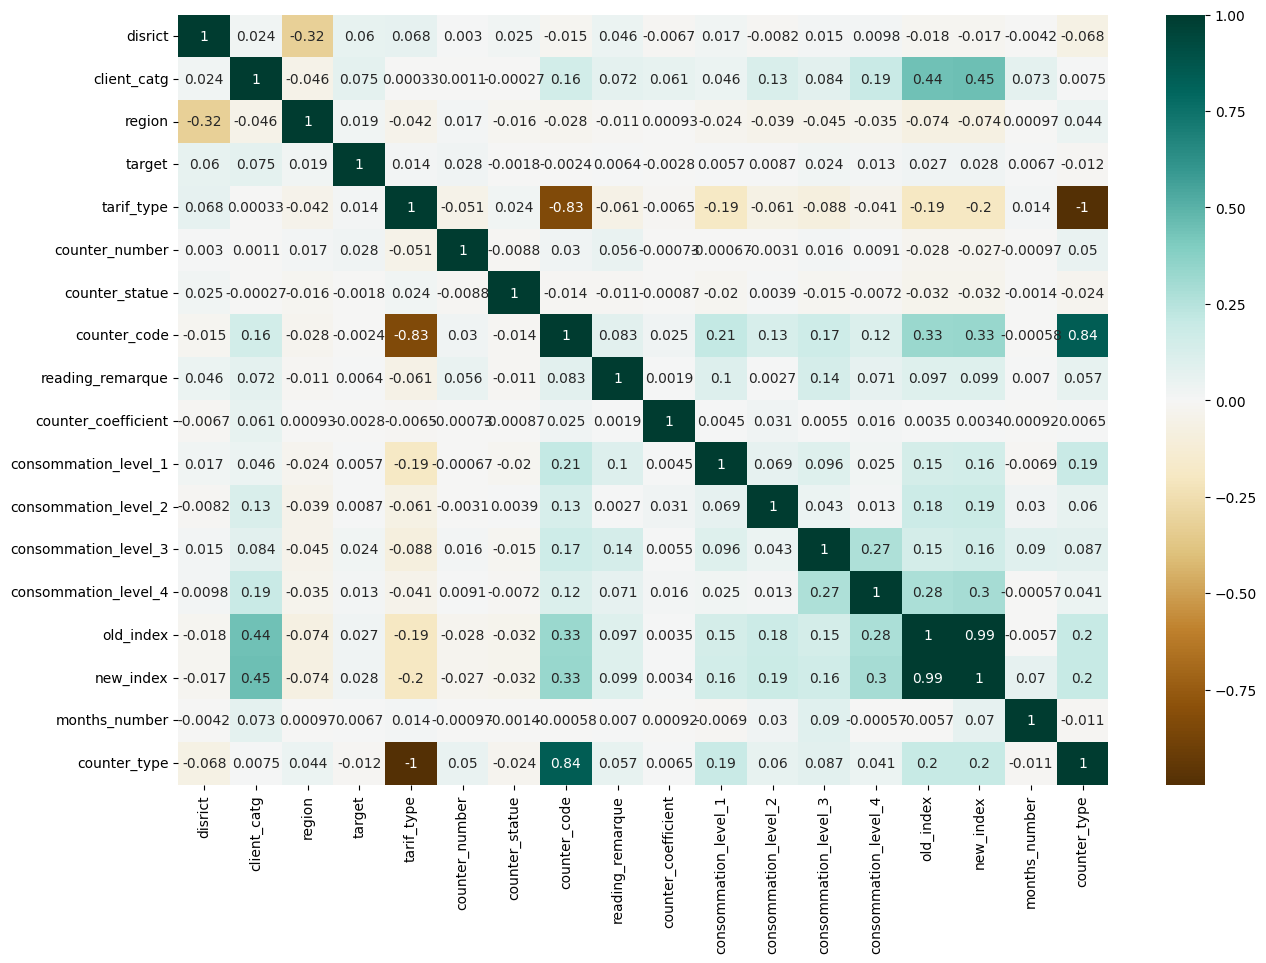

In [ ]:
plt.figure(figsize=(15, 10))
c = dataset.corr()
sns.heatmap(c, cmap='BrBG', annot=True)
c

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4456063 entries, 0 to 4456062
Data columns (total 20 columns):
 #   Column                Dtype  
---  ------                -----  
 0   disrict               int64  
 1   client_id             object 
 2   client_catg           int64  
 3   region                int64  
 4   target                float64
 5   invoice_date          object 
 6   tarif_type            int64  
 7   counter_number        int64  
 8   counter_statue        int64  
 9   counter_code          int64  
 10  reading_remarque      int64  
 11  counter_coefficient   int64  
 12  consommation_level_1  int64  
 13  consommation_level_2  int64  
 14  consommation_level_3  int64  
 15  consommation_level_4  int64  
 16  old_index             int64  
 17  new_index             int64  
 18  months_number         int64  
 19  counter_type          int64  
dtypes: float64(1), int64(17), object(2)
memory usage: 713.9+ MB


In [ ]:
dataset.describe()

,disrict,client_catg,region,target,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
count,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06
mean,6.348319e+01,1.194407e+01,2.103525e+02,7.875854e-02,2.012696e+01,1.236300e+11,1.925242e-02,1.724860e+02,7.325683e+00,1.003009e+00,4.123213e+02,1.091456e+02,2.039055e+01,5.314604e+01,1.778041e+04,1.836464e+04,4.480011e+01,6.878830e-01
std,3.273678e+00,6.023312e+00,1.035771e+02,2.693616e-01,1.347257e+01,1.661088e+12,1.630724e-01,1.338772e+02,1.359296e+00,3.086357e-01,7.549375e+02,1.202830e+03,1.577718e+02,8.774326e+02,4.040384e+04,4.099117e+04,3.132316e+03,4.633573e-01
min,6.000000e+01,1.100000e+01,1.010000e+02,0.000000e+00,8.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.200000e+01,1.100000e+01,1.030000e+02,0.000000e+00,1.100000e+01,1.213420e+05,0.000000e+00,5.000000e+00,6.000000e+00,1.000000e+00,8.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.799000e+03,2.065000e+03,4.000000e+00,0.000000e+00
50%,6.200000e+01,1.100000e+01,3.010000e+02,0.000000e+00,1.100000e+01,4.947730e+05,0.000000e+00,2.030000e+02,8.000000e+00,1.000000e+00,2.760000e+02,0.000000e+00,0.000000e+00,0.000000e+00,7.697000e+03,8.200000e+03,4.000000e+00,1.000000e+00
75%,6.300000e+01,1.100000e+01,3.090000e+02,0.000000e+00,4.000000e+01,1.115547e+06,0.000000e+00,2.070000e+02,9.000000e+00,1.000000e+00,6.020000e+02,0.000000e+00,0.000000e+00,0.000000e+00,2.166500e+04,2.235100e+04,4.000000e+00,1.000000e+00
max,6.900000e+01,5.100000e+01,3.990000e+02,1.000000e+00,4.500000e+01,2.798115e+13,4.000000e+00,6.000000e+02,9.000000e+00,5.000000e+01,9.999100e+05,9.990730e+05,6.449200e+04,5.479460e+05,2.800280e+06,2.870972e+06,6.366240e+05,1.000000e+00


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler

In [ ]:
# vectorizer = CountVectorizer()
# dataset['client_id'] = vectorizer.fit_transform(dataset['client_id']).toarray()

In [ ]:
# dataset['client_id']

In [ ]:
# dataset['client_id'].shape

In [ ]:
# dataset['client_id'].nunique()

## Split the data into X and Y

In [ ]:
X = dataset
X = X.drop(columns=['target'])
X

,disrict,client_id,client_catg,region,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,60,train_Client_0,11,101,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,1
1,60,train_Client_0,11,101,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,1
2,60,train_Client_0,11,101,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,1
3,60,train_Client_0,11,101,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,1
4,60,train_Client_0,11,101,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456058,60,train_Client_99998,11,101,2005-08-19,10,1253571,0,202,9,1,400,135,0,0,3197,3732,8,1
4456059,60,train_Client_99998,11,101,2005-12-19,10,1253571,0,202,6,1,200,6,0,0,3732,3938,4,1
4456060,60,train_Client_99999,11,101,1996-09-25,11,560948,0,203,6,1,259,0,0,0,13884,14143,4,1
4456061,60,train_Client_99999,11,101,1996-05-28,11,560948,0,203,6,1,603,0,0,0,13281,13884,4,1


In [ ]:
Y = dataset['target']
Y

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
4456058    0.0
4456059    0.0
4456060    0.0
4456061    0.0
4456062    0.0
Name: target, Length: 4456063, dtype: float64

In [ ]:
scaler = StandardScaler()

X = scaler.fit_transform(X.drop(columns=['client_id', 'invoice_date']))

In [ ]:
X = pd.DataFrame(X, columns=['disrict',	'client_catg',	'region',	'tarif_type',	'counter_number',	'counter_statue',	'counter_code',	'reading_remarque',	'counter_coefficient',	'consommation_level_1',	'consommation_level_2',	'consommation_level_3',	'consommation_level_4',	'old_index',	'new_index',	'months_number',	'counter_type'])

In [ ]:
X.shape

(4456063, 17)

In [ ]:
X.describe()

,disrict,client_catg,region,tarif_type,counter_number,...,consommation_level_4,old_index,new_index,months_number,counter_type
count,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,...,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06,4.456063e+06
mean,-3.301362e-17,1.077152e-16,-1.078938e-16,4.782383e-17,3.233753e-17,...,2.015515e-17,3.184003e-17,-3.309016e-17,-7.060679e-18,9.133598e-18
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.063999e+00,-1.567354e-01,-1.055760e+00,-9.001221e-01,-7.442709e-02,...,-6.056994e-02,-4.400674e-01,-4.480147e-01,-1.430255e-02,-1.484563e+00
25%,-4.530657e-01,-1.567354e-01,-1.036451e+00,-6.774475e-01,-7.442702e-02,...,-6.056994e-02,-3.955420e-01,-3.976380e-01,-1.302554e-02,-1.484563e+00
50%,-4.530657e-01,-1.567354e-01,8.751696e-01,-6.774475e-01,-7.442679e-02,...,-6.056994e-02,-2.495657e-01,-2.479716e-01,-1.302554e-02,6.735990e-01
75%,-1.475989e-01,-1.567354e-01,9.524068e-01,1.475074e+00,-7.442642e-02,...,-6.056994e-02,9.614399e-02,9.724915e-02,-1.302554e-02,6.735990e-01
max,1.685202e+00,6.484130e+00,1.821325e+00,1.846198e+00,1.677064e+01,...,6.244274e+02,6.886721e+01,6.959078e+01,2.032296e+02,6.735990e-01


In [ ]:
X

,disrict,client_catg,region,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,-1.063999,-0.156735,-1.05576,-0.677447,-0.074426,-0.118061,0.227925,0.496078,-0.00975,-0.437548,-0.090741,-0.129241,-0.06057,-0.086091,-0.097110,-0.013026,0.673599
1,-1.063999,-0.156735,-1.05576,-0.677447,-0.074426,-0.118061,0.227925,-0.975272,-0.00975,1.043370,0.062232,-0.129241,-0.06057,-0.135789,-0.114333,-0.013026,0.673599
2,-1.063999,-0.156735,-1.05576,-0.677447,-0.074426,-0.118061,0.227925,0.496078,-0.00975,-0.383239,-0.090741,-0.129241,-0.06057,-0.078122,-0.088254,-0.013026,0.673599
3,-1.063999,-0.156735,-1.05576,-0.677447,-0.074426,-0.118061,0.257803,0.496078,-0.00975,-0.411056,-0.090741,-0.129241,-0.06057,-0.075077,-0.085766,-0.013026,0.673599
4,-1.063999,-0.156735,-1.05576,-0.677447,-0.074426,-0.118061,0.257803,1.231754,-0.00975,0.211513,-0.090741,-0.129241,-0.06057,-0.067182,-0.066518,-0.010472,0.673599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4456058,-1.063999,-0.156735,-1.05576,-0.751672,-0.074426,-0.118061,0.220455,1.231754,-0.00975,-0.016321,0.021495,-0.129241,-0.06057,-0.360941,-0.356971,-0.011749,0.673599
4456059,-1.063999,-0.156735,-1.05576,-0.751672,-0.074426,-0.118061,0.220455,-0.975272,-0.00975,-0.281244,-0.085752,-0.129241,-0.06057,-0.347700,-0.351945,-0.013026,0.673599
4456060,-1.063999,-0.156735,-1.05576,-0.677447,-0.074427,-0.118061,0.227925,-0.975272,-0.00975,-0.203091,-0.090741,-0.129241,-0.06057,-0.096437,-0.102989,-0.013026,0.673599
4456061,-1.063999,-0.156735,-1.05576,-0.677447,-0.074427,-0.118061,0.227925,-0.975272,-0.00975,0.252576,-0.090741,-0.129241,-0.06057,-0.111361,-0.109308,-0.013026,0.673599


# Model

In [ ]:
import tensorflow as tf
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.under_sampling import RandomUnderSampler

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.921810025425992
0.48314606741573035
0.001234248973851144


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.9218167578157435
0.0
0.0


In [ ]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(x_train, y_train)
y_pred_frst = forest.predict(x_test)
print(accuracy_score(y_test, y_pred_frst))
print(precision_score(y_test, y_pred_frst))
print(recall_score(y_test, y_pred_frst))

0.9218167578157435
0.0
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))
print(precision_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

0.8807267390323761
0.2485718993738328
0.2597950572634117


In [ ]:
X_new = pd.DataFrame(SelectKBest(f_classif, k=5).fit_transform(X, Y))
X_new

,0,1,2,3,4
0,-1.063999,-0.156735,-0.074426,-0.086091,-0.097110
1,-1.063999,-0.156735,-0.074426,-0.135789,-0.114333
2,-1.063999,-0.156735,-0.074426,-0.078122,-0.088254
3,-1.063999,-0.156735,-0.074426,-0.075077,-0.085766
4,-1.063999,-0.156735,-0.074426,-0.067182,-0.066518
...,...,...,...,...,...
4456058,-1.063999,-0.156735,-0.074426,-0.360941,-0.356971
4456059,-1.063999,-0.156735,-0.074426,-0.347700,-0.351945
4456060,-1.063999,-0.156735,-0.074427,-0.096437,-0.102989
4456061,-1.063999,-0.156735,-0.074427,-0.111361,-0.109308


In [ ]:
sampler = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = sampler.fit_resample(X_new, Y)

In [ ]:
X_resampled.shape

(701906, 5)

In [ ]:
print(y_resampled[y_resampled==0].shape)
print(y_resampled[y_resampled==1].shape)

(350953,)
(350953,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.5734210938724338
0.5691443388072601
0.6009925275226741


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.566212192446325
0.5595970033583053
0.6178198619588158


In [ ]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(x_train, y_train)
y_pred_frst = forest.predict(x_test)
print(accuracy_score(y_test, y_pred_frst))
print(precision_score(y_test, y_pred_frst))
print(recall_score(y_test, y_pred_frst))

0.5583479363451155
0.5369972311279511
0.8407677827847813


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))
print(precision_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

0.5545725235429043
0.5544778903268387
0.5511094632365524


In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.5767121140887008
0.5776835748090938
0.5674519422736866


In [ ]:
sampler = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = sampler.fit_resample(X, Y)

In [ ]:
X_resampled.shape

(701906, 17)

In [ ]:
print(y_resampled[y_resampled==0].shape)
print(y_resampled[y_resampled==1].shape)

(350953,)
(350953,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.1)

In [ ]:
print(x_train.shape)
print(x_test.shape)

In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.6049635993218504
0.6099994131799777
0.5901890648952478


In [ ]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=3, random_state=0)
clf.fit(x_train, y_train)
y_pred_gd = clf.predict(x_test)
print(accuracy_score(y_test, y_pred_gd))
print(precision_score(y_test, y_pred_gd))
print(recall_score(y_test, y_pred_gd))

0.5783647476172159
0.5677014451631519
0.6702151819678647


In [ ]:
forest = RandomForestClassifier(max_depth=2, random_state=0)
forest.fit(x_train, y_train)
y_pred_frst = forest.predict(x_test)
print(accuracy_score(y_test, y_pred_frst))
print(precision_score(y_test, y_pred_frst))
print(recall_score(y_test, y_pred_frst))

0.551908364320212
0.5332522732078664
0.8590529722364163


In [ ]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred_tree = tree.predict(x_test)
print(accuracy_score(y_test, y_pred_tree))
print(precision_score(y_test, y_pred_tree))
print(recall_score(y_test, y_pred_tree))

0.6204784089128236
0.622033368388142
0.6212740589337421


In [ ]:
knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print(accuracy_score(y_test, y_pred_knn))
print(precision_score(y_test, y_pred_knn))
print(recall_score(y_test, y_pred_knn))

0.6145802168369164
0.6138522831749923
0.6254755010503605


In [ ]:
clf2 = SVC()
clf2.fit(x_train, y_train)
y_pred_svm = clf2.predict(x_test)
print(accuracy_score(y_test, y_pred_svm))
print(precision_score(y_test, y_pred_svm))
print(recall_score(y_test, y_pred_svm))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(136, activation='relu'),
    tf.keras.layers.Dense(68, activation='relu'),
    tf.keras.layers.Dense(51, activation='relu'),
    tf.keras.layers.Dense(34, activation='relu'),
    tf.keras.layers.Dense(17, activation='relu'),
    tf.keras.layers.Dense(9, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics= 'accuracy')

In [ ]:
model.fit(x_train, y_train, epochs=5)

In [ ]:
clf2 = SVC()
clf2.fit(x_train, y_train)
y_pred_svm = clf2.predict(x_test)
accuracy_score(y_test, y_pred_svm)